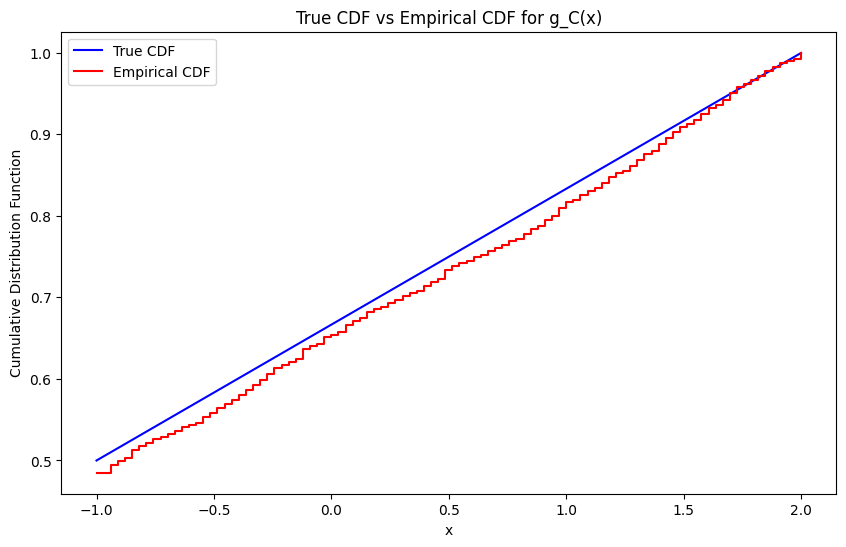

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def g_C(x):
    def distance(x, y):
        return np.abs(x - y)
    
    if x < -1 or x > 1:
        inf_dist = min(distance(x, -1), distance(x, 1))
        return inf_dist
    else:
        inf_dist = min(distance(x, -1), distance(x, 1))
        return -inf_dist
    

def empirical_cdf(sample, x):
    return np.mean(sample <= x)

# Generate sample points and compute g_C(s)
np.random.seed(12)  # For reproducibility
n = 1000
s = np.random.uniform(-3, 3, n)
s = np.maximum(s, 0)
g_values =  np.vectorize(g_C)(s)

# Define range of x values for plotting
x_values = np.linspace(min(g_values), max(g_values), 100)

# Compute empirical CDF values for g_C(s)
empirical_cdf_values = np.array([empirical_cdf(g_values, x) for x in x_values])

# True CDF function (assuming a specific form for demonstration purposes)
def true_cdf_g(x):
    return (x+4)/6.0

# Compute true CDF values for g_C(s)
true_cdf_values = np.vectorize(true_cdf_g)(x_values)

# Plot true CDF and empirical CDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_cdf_values, label='True CDF', color='blue')
plt.step(x_values, empirical_cdf_values, where='post', label='Empirical CDF', color='red')
plt.xlabel('x')
plt.ylabel('Cumulative Distribution Function')
plt.legend()
plt.title('True CDF vs Empirical CDF for g_C(x)')
plt.show()



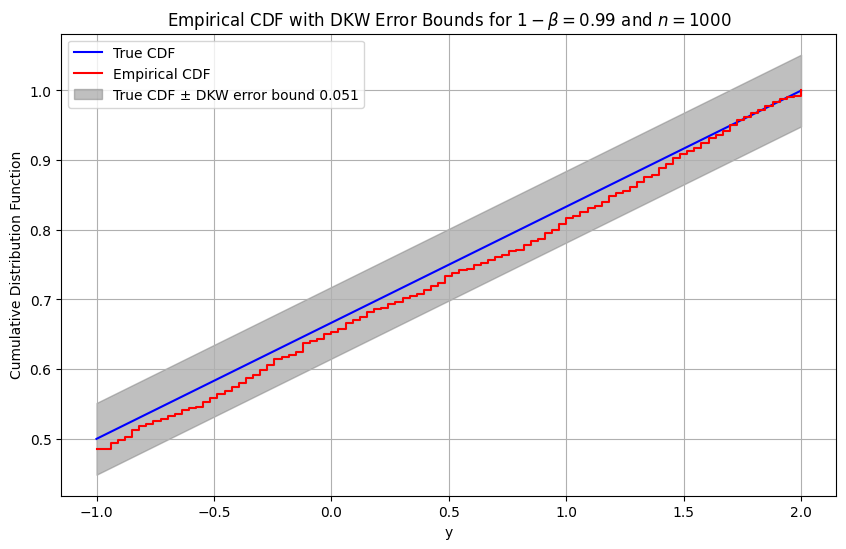

Maximum difference between empirical CDF and true CDF: 0.0268
DKW bound: 0.0515
The maximum difference is within the DKW bound.


In [2]:
# DKW inequality bound
epsilon = 0.01
dkw_bound = np.sqrt(np.log(2/epsilon) / (2 * n))

# Plot the DKW bounds
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_cdf_values, label='True CDF', color='blue')
plt.step(x_values, empirical_cdf_values, where='post', label='Empirical CDF', color='red')
plt.fill_between(x_values, true_cdf_values - dkw_bound, true_cdf_values + dkw_bound, color='gray', alpha=0.5, label=f'True CDF ± DKW error bound {dkw_bound:.3f}')
plt.xlabel('y')
plt.ylabel('Cumulative Distribution Function')
plt.grid(True)
plt.legend()
plt.title(r'Empirical CDF with DKW Error Bounds for $1-\beta = 0.99$ and $n=1000$')
plt.savefig('ex21.jpg')
plt.show()

# Calculate the maximum difference between EDF and true CDF
max_diff = np.max(np.abs(empirical_cdf_values - true_cdf_values))
print(f"Maximum difference between empirical CDF and true CDF: {max_diff:.4f}")
print(f"DKW bound: {dkw_bound:.4f}")

# Verify if the maximum difference is within the DKW bound
if max_diff <= dkw_bound:
    print("The maximum difference is within the DKW bound.")
else:
    print("The maximum difference exceeds the DKW bound.")


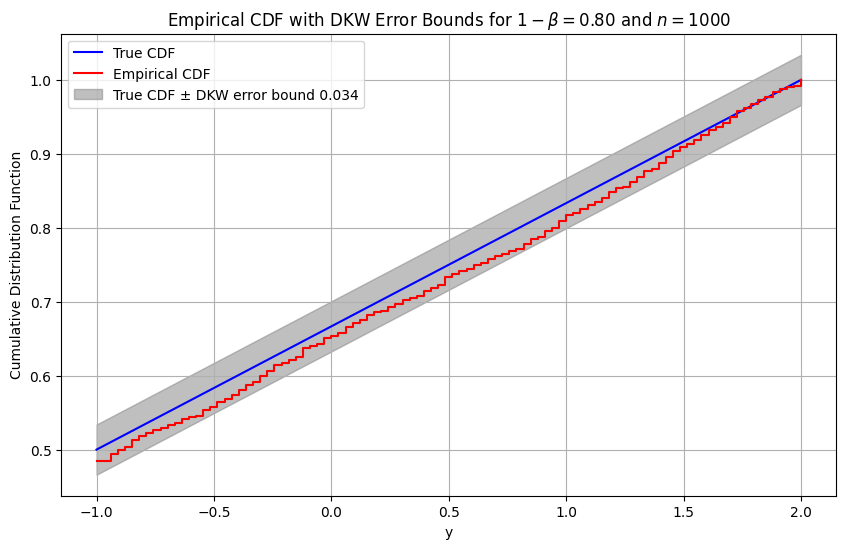

Maximum difference between empirical CDF and true CDF: 0.0268
DKW bound: 0.0339
The maximum difference is within the DKW bound.


In [3]:
# DKW inequality bound
epsilon = 0.2
dkw_bound = np.sqrt(np.log(2/epsilon) / (2 * n))

# Plot the DKW bounds
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_cdf_values, label='True CDF', color='blue')
plt.step(x_values, empirical_cdf_values, where='post', label='Empirical CDF', color='red')
plt.fill_between(x_values, true_cdf_values - dkw_bound, true_cdf_values + dkw_bound, color='gray', alpha=0.5, label=f'True CDF ± DKW error bound {dkw_bound:.3f}')
plt.xlabel('y')
plt.ylabel('Cumulative Distribution Function')
plt.grid(True)
plt.legend()
plt.title(r'Empirical CDF with DKW Error Bounds for $1-\beta = 0.80$ and $n=1000$')
plt.savefig('ex22.jpg')
plt.show()

# Calculate the maximum difference between EDF and true CDF
max_diff = np.max(np.abs(empirical_cdf_values - true_cdf_values))
print(f"Maximum difference between empirical CDF and true CDF: {max_diff:.4f}")
print(f"DKW bound: {dkw_bound:.4f}")

# Verify if the maximum difference is within the DKW bound
if max_diff <= dkw_bound:
    print("The maximum difference is within the DKW bound.")
else:
    print("The maximum difference exceeds the DKW bound.")